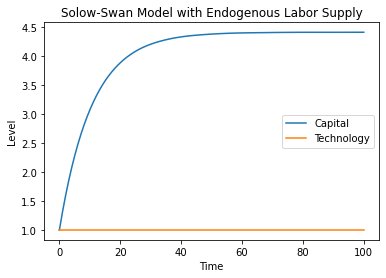

In [1]:
import numpy as np
from scipy.optimize import minimize_scalar
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Model parameters
alpha = 0.3   # capital share in production function
beta = 0.96   # discount factor
delta = 0.1   # depreciation rate
sigma = 2     # intertemporal elasticity of substitution
tau = 0.2     # import tax
h = 0.1       # labor supply

# Production function
def f(k):
    return k**alpha

# Derivative of production function
def f_prime(k):
    return alpha * k**(alpha - 1)

# Utility function
def u(c):
    return (c**(1 - sigma) - 1) / (1 - sigma)

# Derivative of utility function
def u_prime(c):
    return c**(-sigma)

# Objective function for optimal consumption
def obj(c, r, w):
    return -u(c) + beta * (1 + r - delta) * u_prime(w * (1 - tau) + (r + 1 - delta) * (1 - tau) - c)

# Find optimal consumption given interest rate and wage rate
def solve_optimal_consumption(r, w):
    result = minimize_scalar(lambda c: obj(c, r, w), bounds=(0, w * (1 - tau) + (r + 1 - delta) * (1 - tau)), method='bounded')
    return result.x

# Solow-Swan model with endogenous labor supply
def solow_swan_with_labor(t, y):
    k, z = y
    r = alpha * z * (k**(alpha - 1)) + 1 - delta
    w = (1 - alpha) * z * (k**alpha)
    c = solve_optimal_consumption(r, w)
    dkdt = s * (w * (1 - tau) + (r + 1 - delta) * (1 - tau) - c) - delta * k
    dzdt = 0
    return [dkdt, dzdt]

# Initial conditions
k0 = 1
z0 = 1

# Time horizon
T = 100

# Saving rate
s = 0.3

# Solve the model numerically
solution = solve_ivp(solow_swan_with_labor, [0, T], [k0, z0], t_eval=np.linspace(0, T, 100))

# Plot the results
plt.plot(solution.t, solution.y[0], label='Capital')
plt.plot(solution.t, solution.y[1], label='Technology')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Level')
plt.title('Solow-Swan Model with Endogenous Labor Supply')
plt.show()
